## Yield Gap Strategy
#### Steps: CMA, Yield Gap, and Mix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
path = 'C:/Users/bearp/Dropbox/Investment/YGS/DB/'
#path = '/home/j/Dropbox/Investment/YGS/DB/'

#### CMA
The values of the cash management account are calculated by the official rates in Korea.   
I will not create the CMA values but when the money flows to CMA, it calculates.

The raw data has the different columns of years and dates. We need to make it as data frame. So, initially read the values as string and change the rate values as numeric.

In [3]:
rates = pd.read_table(path + 'Official_Rates.txt', dtype='str')
rates.head()

,Year,Date,Rates
0,2018,11-30,1.75
1,2017,11-30,1.5
2,2016,06-09,1.25
3,2015,06-11,1.5
4,2015,03-12,1.75


In [4]:
pd.to_numeric(rates.Rates, downcast='float')
rates['Dates'] = rates.Year + '-'+ rates.Date
rates.Dates=pd.to_datetime(rates.Dates)
r_ch=rates.set_index('Dates').sort_index(ascending=True)
r_ch.tail()

,Year,Date,Rates
Dates,,,
2015-03-12,2015,03-12,1.75
2015-06-11,2015,06-11,1.5
2016-06-09,2016,06-09,1.25
2017-11-30,2017,11-30,1.5
2018-11-30,2018,11-30,1.75


Drawing the pictures has somewhat problems, I create the date range using the pd.date_range.

In [5]:
r_daily=r_ch.resample('B').asfreq().ffill()
r_daily.to_excel(path+'testing.xlsx')

In [6]:
r_daily=pd.read_excel(path+'testing.xlsx', index_col=0)
r_daily.head()

,Year,Date,Rates
Dates,,,
1999-05-06,1999,05-06,4.75
1999-05-07,1999,05-06,4.75
1999-05-10,1999,05-06,4.75
1999-05-11,1999,05-06,4.75
1999-05-12,1999,05-06,4.75


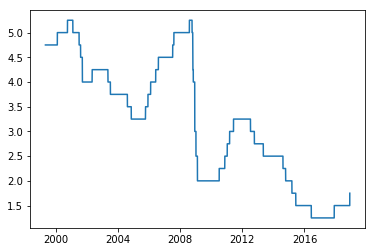

In [7]:
#Dicpicting the official rates changes in Korea
plt.plot(r_daily['Rates'])

#### Yield Gap Values
I need to decide to choose proper benchmark index

In [8]:
per = pd.read_csv(path+'2001.csv', index_col=0)
per.head()

,코스피,코스피 200,코스피 100,코스피 50,코스피 대형주,코스피 중형주,코스피 소형주,제조업,음식료품,섬유의복,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
년/월/일,,,,,,,,,,,,,,,,,,,,,
2001/12/28,29.29,16.35,15.97,16.04,23.17,-,23.02,15.22,8.70,-,...,22.19,7.82,-,-,21.28,-,81.42,-,-,3.04
2001/12/27,28.42,15.74,15.36,15.44,22.24,-,22.59,14.80,8.49,-,...,21.61,7.82,-,-,20.07,-,79.40,-,-,2.91
2001/12/26,27.67,15.37,15.00,15.05,21.75,-,22.56,14.47,8.41,-,...,21.61,7.79,-,-,20.00,-,63.47,-,-,2.90
2001/12/24,26.42,15.19,14.83,14.87,20.78,-,22.44,14.27,8.56,-,...,21.57,7.67,-,-,20.00,-,62.24,-,-,2.84
2001/12/21,26.36,15.13,14.77,14.81,20.70,-,22.56,14.25,8.61,-,...,21.39,7.61,-,-,19.86,-,61.60,-,-,2.82


In [9]:
raw_per = pd.read_csv(path+'2000.csv')
periods = pd.Series(range(2001,2019))

for i in periods:
    i = str(i)
    value = pd.read_csv(path+i+'.csv')
    raw_per = raw_per.append(value)
len(raw_per)

4690

In [10]:
raw_per['Dates']=raw_per['년/월/일']
raw_per['KOSPI']=raw_per['코스피']
raw_per['KOSPI200']=raw_per['코스피 200']
raw_per.Dates = pd.to_datetime(raw_per.Dates)
raw_per.tail()

,년/월/일,코스피,코스피 200,코스피 100,코스피 50,코스피 대형주,코스피 중형주,코스피 소형주,제조업,음식료품,...,운수창고업,통신업,금융업,은행,증권,보험,서비스업,Dates,KOSPI,KOSPI200
239,2018/01/08,13.23,12.13,11.64,11.12,12.02,19.23,27.79,12.05,12.96,...,-,9.64,10.82,7.88,13.5,12.1,34.65,2018-01-08,13.23,12.13
240,2018/01/05,13.15,12.06,11.56,11.04,11.93,19.29,27.79,12.04,13.04,...,-,9.68,10.69,7.73,13.13,12.06,33.8,2018-01-05,13.15,12.06
241,2018/01/04,12.99,11.9,11.4,10.89,11.77,19.12,27.43,11.85,13.11,...,-,9.46,10.56,7.63,12.87,12.01,33.67,2018-01-04,12.99,11.9
242,2018/01/03,13.09,11.99,11.49,10.98,11.86,19.36,27.57,12,13.19,...,-,9.57,10.65,7.68,12.83,12.22,33.35,2018-01-03,13.09,11.99
243,2018/01/02,13.06,11.95,11.44,10.94,11.82,19.39,27.38,11.9,13.17,...,-,9.65,10.68,7.7,12.8,12.23,33.73,2018-01-02,13.06,11.95


In [11]:
raw_per = raw_per.set_index('Dates')
raw_per=raw_per.sort_index(ascending=True)

In [12]:
# No more data before 2000-04-03, the data for analysis starts from 2000-04-03
# The values are string so far, I need to change it to numeric.The 'coerce' in error makes the string become nan.
per = raw_per.loc['2000-04-03':,['KOSPI','KOSPI200']]
per.KOSPI = pd.to_numeric(per.KOSPI, downcast='float',errors='coerce')
per.KOSPI200 = pd.to_numeric(per.KOSPI200, downcast='float', errors='coerce')
per.tail()

,KOSPI,KOSPI200
Dates,,
2018-12-21,9.68,8.64
2018-12-24,9.65,8.62
2018-12-26,9.53,8.50
2018-12-27,9.53,8.49
2018-12-28,9.58,8.53


In [13]:
#I can figure out that which column has nan values
per.isnull().any()
# There is nan in the KOSPI column.

KOSPI        True
KOSPI200    False
dtype: bool

In [14]:
#We can find that there are 4 missing values in the KOSPI column
per.isnull().sum()

KOSPI       4
KOSPI200    0
dtype: int64

In [15]:
# Now, we can see the missing values
per[per.KOSPI.isnull()]

,KOSPI,KOSPI200
Dates,,
2001-04-12,NaN,14.66
2001-04-13,NaN,14.66
2001-04-16,NaN,14.48
2001-04-17,NaN,14.66


In [16]:
#Now fill the missing values following the previous values
per=per.fillna(method='ffill')
per.isnull().sum()
#No more missing values

KOSPI       0
KOSPI200    0
dtype: int64

In [17]:
per['Yield']=(1/per['KOSPI'])*100

In [18]:
df = per.join(r_daily, how='inner')
df['Gap'] = df['Yield'] - df['Rates']

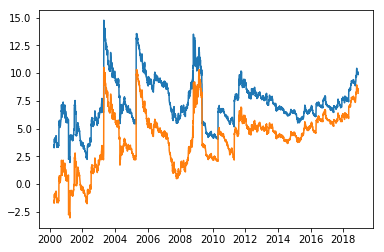

In [19]:
plt.plot(df.Yield)
plt.plot(df.Gap)

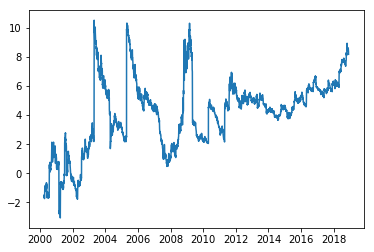

In [20]:
plt.plot(df.Gap)

### Simulations
In order to simulate the result of the strategy, we need to construct the logics.
The initial idea   
1. If the Yield Gap is greater than 6 percent per year, assets move to the stock.
2. The maximum amount of stock is 90 percent.
3. If the value of the Yield Gap becomes lower than 3 percent, the assets are allocated to the liquidity.


In [58]:
# Assign the values
enter = 6
exit = 4
s_ratio = 0.9
amount = 100

In [59]:
data = df
print(len(data))

4609


In [70]:
data = df
print(len(data))
yg = df

### FIRST

df1=data.loc[:,:][data.Gap>enter]
print(len(data),'length of data')
series = df1.iloc[0]
dates = str(series.name)
sdate = dates[0:10]
print(sdate)
df1=data.loc[sdate:]

yg0 = yg.loc[:sdate]

df1=df1.loc[:,:][df1.Gap<exit]
series = df1.iloc[0]
dates = str(series.name)
edate = dates[0:10]
print(edate)
df2=data.loc[edate:]
print(len(df2),'remaining days')

yg1 = yg[sdate:edate]
print(len(yg1),'length of 1')

### SECOND

data=df2

df1=data.loc[:,:][data.Gap>enter]
print(len(data),'length of data')
series = df1.iloc[0]
dates = str(series.name)
sdate = dates[0:10]
print(sdate)
df1=data.loc[sdate:]

yg2=yg.loc[edate:sdate]
print(len(yg2),'length of 2')

### THIRD

df1=df1.loc[:,:][df1.Gap<exit]
series = df1.iloc[0]
dates = str(series.name)
edate = dates[0:10]
print(edate)
df2=data.loc[edate:]
print(len(df2),'remaining days')

yg3 = yg[sdate:edate]
print(len(yg3),'length of 3')

### FOURTH

data=df2

df1=data.loc[:,:][data.Gap>enter]
print(len(data),'length of data')
series = df1.iloc[0]
dates = str(series.name)
sdate = dates[0:10]
print(sdate)
df1=data.loc[sdate:]

yg4=yg[edate:sdate]
print(len(yg4),'length of 4')

# Fifth

df1=df1.loc[:,:][df1.Gap<exit]
series = df1.iloc[0]
dates = str(series.name)
edate = dates[0:10]
print(edate)
df2=data.loc[edate:]
print(len(df2),'remaining days')

yg5 = yg[sdate:edate]
print(len(yg5),'length of 5')


### Sixth
data=df2

df1=data.loc[:,:][data.Gap>enter]
print(len(data),'length of data')
series = df1.iloc[0]
dates = str(series.name)
sdate = dates[0:10]
print(sdate)
df1=data.loc[sdate:]

yg6 = yg[edate:sdate]
print(len(yg6),'length of 6')

### Seventh
df1=df1.loc[:,:][df1.Gap<exit]
series = df1.iloc[0]
dates = str(series.name)
edate = dates[0:10]
print(edate)
df2=data.loc[edate:]
print(len(df2),'remaining days')

yg7 = yg[sdate:edate]
print(len(yg7),'length of 7')

### Eighth
data=df2

df1=data.loc[:,:][data.Gap>enter]
print(len(data),'length of data')
series = df1.iloc[0]
dates = str(series.name)
sdate = dates[0:10]
print(sdate)
df1=data.loc[sdate:]

yg8 = yg[edate:sdate]
print(len(yg8),'length of 8')

### Nineth

yg9=yg[sdate:]
print(len(yg9),'length of 9')

print(len(yg0)+len(yg1)+len(yg2)+len(yg3)+len(yg4)+len(yg5)+len(yg6)+len(yg7)+len(yg8)+len(yg9))

4609
4609 length of data
2003-04-28
2004-04-21
3621 remaining days
239 length of 1
3621 length of data
2005-04-22
252 length of 2
2007-04-04
2884 remaining days
487 length of 3
2884 length of data
2008-10-22
382 length of 4
2009-05-06
2370 remaining days
134 length of 5
2370 length of data
2011-08-09
570 length of 6
2014-05-13
1119 remaining days
683 length of 7
1119 length of data
2016-06-16
516 length of 8
604 length of 9
4618


In [57]:
yg.loc['2011-08-09':,][yg.Gap<4]

C:\Users\bearp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,KOSPI,KOSPI200,Yield,Year,Date,Rates,Gap
Dates,,,,,,,
2014-05-13,15.420000,14.210000,6.485085,2013,05-09,2.50,3.985085
2014-05-14,15.640000,14.430000,6.393862,2013,05-09,2.50,3.893862
2014-05-15,15.640000,14.420000,6.393862,2013,05-09,2.50,3.893862
2014-05-16,15.690000,14.470000,6.373487,2013,05-09,2.50,3.873487
2014-05-19,15.700000,14.490000,6.369427,2013,05-09,2.50,3.869427
2014-05-20,15.680000,14.460000,6.377551,2013,05-09,2.50,3.877551
2014-05-21,15.660000,14.440000,6.385696,2013,05-09,2.50,3.885696
2014-05-22,15.710000,14.490000,6.365372,2013,05-09,2.50,3.865372
2014-05-23,15.690000,14.470000,6.373487,2013,05-09,2.50,3.873487


In [37]:
yg = df
data=df2
df1=data.loc[:,:][data.Gap>enter]
print(len(data),'length of data')
series = df1.iloc[0]
dates = str(series.name)
sdate = dates[0:10]
print(sdate)
df1=data.loc[sdate:]

df1=df1.loc[:,:][df1.Gap<exit]
series = df1.iloc[0]
dates = str(series.name)
edate = dates[0:10]
print(edate)
df2=data.loc[edate:]
print(len(df2),'remaining days')

yg2 = yg[sdate:edate]
len(yg2)

3620 length of data
2005-04-22
2007-05-03


507

In [24]:
df3=df2.loc[:,:][df2.Gap>enter]
print(len(df2),'length of data')
series = df3.iloc[0]
dates = str(series.name)
sdate = dates[0:10]
print(sdate)
df3=data.loc[sdate:]
print(len(df3),'length of new')

NameError: name 'df2' is not defined

In [ ]:
df4=df3.loc[:,:][df3.Gap<exit]
print(len(df3),'length of data')
series = df4.iloc[0]
dates = str(series.name)
sdate = dates[0:10]
print(sdate)
df4=data.loc[sdate:]
print(len(df4),'length of new')

In [ ]:
df1=data.loc[:date]
len(df1)

In [ ]:
print(len(data))
data.loc[sdate:]=np.nan
data=data.dropna()
len(data)

In [ ]:
data=df

sample_list=[]
for i in np.arange(20):
    i = i +1
    a = 'df_'
    level=str(i)
    sample_list.append((a+level))
print(sample_list)


for i in sample_list:
    name = str(i)
    name = int(name[3:4])
    if name % 2 == 0:
        print(i,'even')
        i = data.loc[:][data.Gap>enter]
        print(i)
#        series = i.iloc[0]
        dt = str(series.name)
        sdt = dt[0:10]
        data.loc[sdt:]=np.nan
        i=data.dropna()
       
    else:
        print(i,'odd')
        i = data.loc[:][data.Gap<exit]
    
    

In [ ]:
df_1

In [ ]:
df2 = data.loc[:,:][data.Gap<exit]
print(len(df2))
df2.head(3)

In [ ]:
data.loc[:'2000-04-06',:].tail()

In [ ]:
len1 = len(df1)
data.iloc[:len1,]

In [ ]:
df3 = data.loc[:,:][data.Gap>enter]
df3.head()